The goal here is to plot out the median number of visits per field after Y10 for each cadence. The data has already been saved by `bash_get_median_nvisits.sh`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import pandas as pd
import numpy as np

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

**Set up**

In [3]:
data_dir = '/global/homes/a/awan/desc/depth_data_outputs/'
outDir = '/global/homes/a/awan/desc/depth_data_outputs/comparisons/'

**Plot the median number of visits for each cadences**

In [4]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', \
       'colossus_2665', 'colossus_2664', 'colossus_2667', 'pontus_2002', \
       'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097', \
       'cadence_roll_75_mix_rolling_mix_10yrs', \
       'roll_mix_100_rolling_mix_10yrs', \
       'roll_mix_rolling_mix_10yrs', \
       'rolling_10yrs', 'tms_roll_10yrs', 'alt_sched', 'alt_sched_rolling']
# for plots
colors = ['dodgerblue' , 'k']
shapes = ['o-', 'd-']

nDbs: 11
nDbs: 11
Saved compare_median_nvisits_11dbs.png


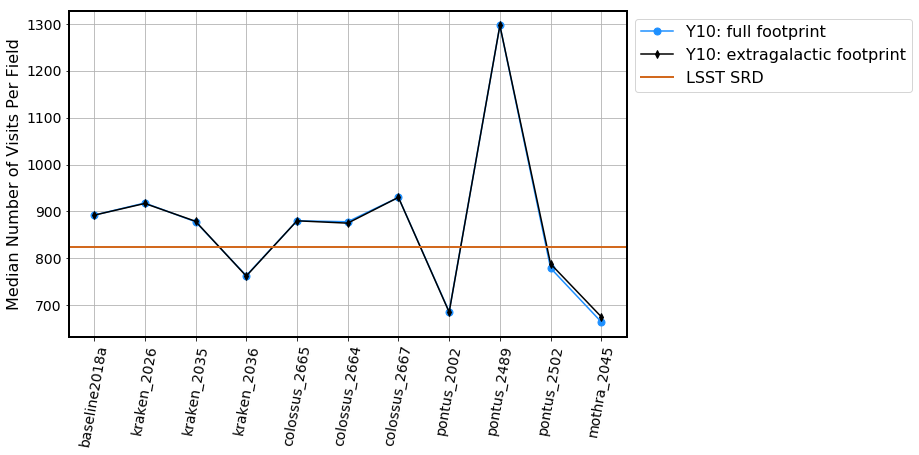

In [5]:
xlabels = []

# read in all the files
all_files = [f for f in os.listdir(data_dir) if f.endswith('csv') and f.__contains__('median')]

# now loop over the files
for i, file in enumerate(all_files):
    if file.__contains__('eg'):
        tag = 'extragalactic footprint'
    else:
        tag = 'full footprint'
    # read in the data
    data = pd.read_csv('%s%s'%(data_dir, file))
    dbnames = np.array(data['dbname'])
    nvisits = data['median number of visits'].values
    
    # first need to create the lists with the data
    nvis = []
    for dbname in dbs:  # loop over dbs
        if dbname.__contains__('_rolling_mix_10yrs'):
            label = dbname.split('_rolling_mix_10yrs')[0]
        else:
            label = dbname
        # add the nvisits for this db to the list
        if dbname in dbnames:
            ind = np.where(dbnames==dbname)[0]
            nvis.append(nvisits[ind])
            xlabels.append(label)
    # now plot
    nDbs = len(nvis)
    print('nDbs: %s'%nDbs)
    plt.plot(range(nDbs), nvis, '%s'%(shapes[i]), markersize=7-2*i, color=colors[i], label='Y10: %s'%tag) 

# plot the LSST SRD requirement
xmin, xmax = plt.gca().get_xlim()
plt.plot([xmin, xmax], np.zeros(2)+825, '-', color=[210/255., 105/255., 30/255.], lw=2, label='LSST SRD') 

# plot details
plt.xticks(range(nDbs), xlabels, rotation=80)
plt.grid()
plt.legend(bbox_to_anchor=(1.,1))
plt.ylabel(r'Median Number of Visits Per Field')
plt.xlim(xmin, xmax)
filename = 'compare_median_nvisits_%sdbs.png'%(nDbs)
plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()